In [1]:
#!pip install tweepy

In [2]:
import pandas as pd
import numpy as np
import tweepy

In [3]:
consumer_key = '7lwWwRVcrj6X4yopfbLmq5wYN'
consumer_secret = 'Wlrqp89iUKp0YZUdEtjHHVLU2sDPEHplWqwz0OefSp4TRDzm8L'
access_token = '1095060652077531137-2xPZpsbdKxmo3XyB2r7JTWhMKy34JQ'
access_token_secret = 'IUlod3xsqmgOLcKbU8pQRh7DDb6EzAVmFHXu8OC8B4FsM'

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth, wait_on_rate_limit=True)

q = 'Real Madrid'
searched_tweets = [status for status in tweepy.Cursor(api.search, q=q).items(1000)]

In [4]:
busca = []
for tweet in searched_tweets:
    busca.append(tweet.text)

In [5]:
data = pd.DataFrame(busca, columns = ['text'])

In [6]:
data.head(5)

,text
0,"“For the president [Florentino Pérez], Mourinh..."
1,RT @iambolar: Today:\n\nLiverpool v Burnley (1...
2,"RT @SC_ESPN: Con polémica, VAR y mucho suspens..."
3,RT @TheSunFootball: Clarence Seedorf 'meets wi...
4,Sekali sekala. Walaupun kalah UCL tapi RM teta...


In [7]:
# verificar numero de palavras em uppercase (caixa alta)
data['text'].apply(lambda x: len([x for x in x.split() if x.isupper()])).sum()

1396

In [8]:
# transformando em lowcase
data['text'] = data['text'].apply(lambda x: " ".join(x.lower() for x in x.split()))
data.head(5)

,text
0,"“for the president [florentino pérez], mourinh..."
1,rt @iambolar: today: liverpool v burnley (1pm)...
2,"rt @sc_espn: con polémica, var y mucho suspens..."
3,rt @thesunfootball: clarence seedorf 'meets wi...
4,sekali sekala. walaupun kalah ucl tapi rm teta...


In [9]:
data['text'] = data['text'].str.replace('[^\w\s]','')
data['text'] = data['text'].str.replace('rt','')
data['text'] = data['text'].str.replace(q.lower(),'')
data.head(5)

,text
0,for the president florentino pérez mourinho wi...
1,iambolar today liverpool v burnley 1pm chelse...
2,sc_espn con polémica var y mucho suspenso dus...
3,thesunfootball clarence seedorf meets with fl...
4,sekali sekala walaupun kalah ucl tapi rm tetap...


In [10]:
#!pip install stop-words

In [18]:
from stop_words import get_stop_words
stop = get_stop_words('spanish')

data['text'] = data['text'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))
data.head(5)

,text
0,president florentino pérez mourinho will perfe...
1,iambolar today liverpool v burnley 1pm chelsea...
2,sc_espn polémica var suspenso dusan tadic anot...
3,thesunfootball clarence seedorf meets florenti...
4,sekali sekala walaupun kalah ucl tapi rm tetap...


In [19]:
# data['text']

0      president florentino pérez mourinho will perfe...
1      iambolar today liverpool v burnley 1pm chelsea...
2      sc_espn polémica var suspenso dusan tadic anot...
3      thesunfootball clarence seedorf meets florenti...
4      sekali sekala walaupun kalah ucl tapi rm tetap...
5      footyshowboats ajax fans madrid hold beer hit ...
6      iambolar today liverpool v burnley 1pm chelsea...
7      enrouteanfield jurgen klopp linked says gets s...
8      thesunfootball clarence seedorf meets florenti...
9      cr7brasil bale nós jogamos mais um time agora ...
10     maijaar kaixo euskaltelebista quedan 63 dias f...
11     rmadrid_stats zidanes record charge seasons 25...
12                                    httpstcospbiqbzzzr
13     persib lihat aksi abdulazizlufti8 mengecoh goz...
14     özil revela padre culpable salida 20m httpstco...
15     deadlinedaylive preparing worldrecord 300m bid...
16     afcajax goals vs many times watched ucl reaaja...
17     real valladolid x veja a

In [20]:
import nltk
from collections import Counter

In [25]:
data['text'].apply(lambda x: pd.value_counts(x.split(" "))).sum(axis = 0).sort_values(ascending=False).head(5)

goles       105.0
liga         81.0
mourinho     79.0
year         69.0
neymar       66.0
dtype: float64

In [22]:
#!pip install pillow
#!pip install wordcloud

In [23]:
from PIL import Image
from wordcloud import WordCloud, ImageColorGenerator
import matplotlib.pyplot as plt
% matplotlib inline

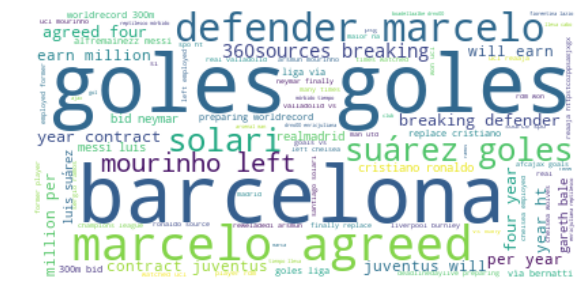

In [24]:
text = " ".join(item for item in data.text)

# Generate a word cloud image
wordcloud = WordCloud(background_color="white").generate(text)

# Display the generated image:
# the matplotlib way:
plt.figure(figsize=[15,5])
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()